# US Flights Analysis: Jan - Apr 2008
## by Pride Chamisa

## Investigation Overview

> This analysis explores flight data that includes arrival and departure details, carriers, arrival and departure delays, reasons for delays, etc, for all commercial flights within the USA, from January to April 2008. The overall goal of the analysis was finding the worst and best times for flights with regards to flight delays and cancellations. 


## Dataset Overview

> This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data consists of 2389217 records in total with 29 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_2008 = pd.read_csv('datasets/2008.csv')

delayed = df_2008.ArrDelay >= 15
on_time = df_2008.ArrDelay < 15

on_time_flights = df_2008[on_time]
delayed_flights = df_2008[delayed]

## The distribution of flights that were on time

> Most flights were highly on time during the mid of the months and also from 23rd to the 29th days of the months. Wednesdays also recorded the highest number of on-time flights, followed by Tuesdays and Thursdays.


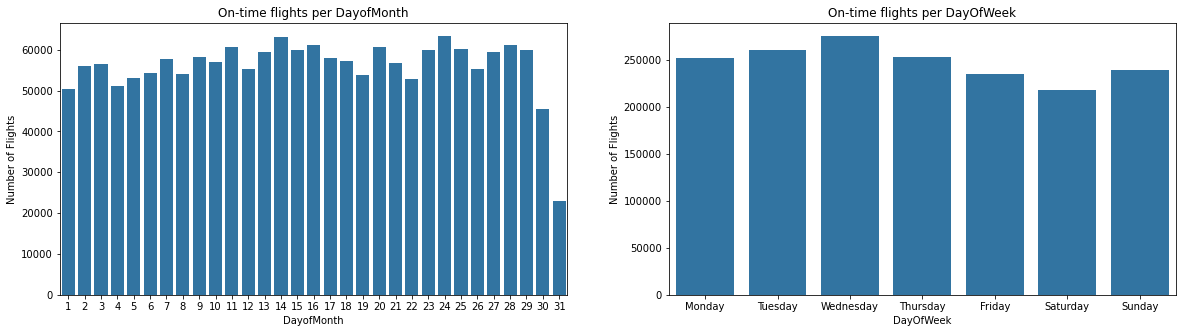

In [3]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
sb.countplot(data=on_time_flights, x='DayofMonth', color=base_color)
plt.title('On-time flights per DayofMonth')
plt.ylabel('Number of Flights');

plt.subplot(1, 2, 2)
p = sb.countplot(data=on_time_flights, x='DayOfWeek', color=base_color)
plt.title('On-time flights per DayOfWeek')
plt.ylabel('Number of Flights');
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
p.set(xticklabels = days);

## The distribution of delayed flights compared to the overall flights

> February and Fridays recorded the highest proportion of delays while the lowest proportion of delays was recorded in April and on Wednesdays. The 4th day of the month and the 31st day of the month also had a higher proportion of delays.

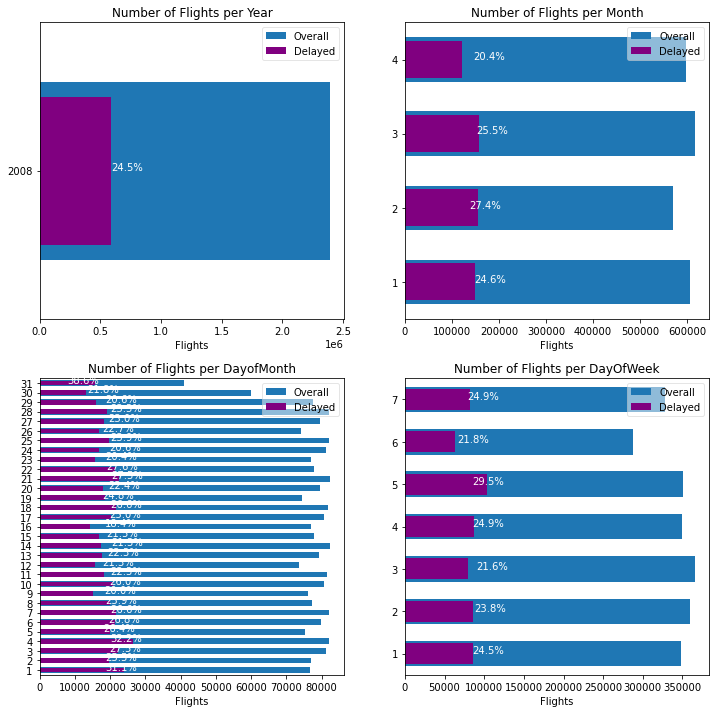

In [4]:
plt.figure(figsize=(12, 12))
n_points = df_2008.shape[0]
for i, j in enumerate(['Year', 'Month', 'DayofMonth', 'DayOfWeek']):
    plt.subplot(2, 2, i+1)

    gen_counts = df_2008[j].value_counts()
    delayed_gen_counts = delayed_flights[j].value_counts()

    gen_counts.sort_index().plot.barh(label='Overall', width=.6)
    delayed_gen_counts.sort_index().plot.barh(label='Delayed', color='purple')

    locs, labels = plt.yticks()
    for loc, label in zip(locs, labels):
        count = gen_counts[int(label.get_text())]
        delayed_count = delayed_gen_counts[int(label.get_text())]
        pct = f'{100*delayed_count/count:0.1f}%'
        plt.text(0.30*count, loc, pct, ha='center', color='w')
        plt.xlabel('Flights')

    plt.legend(framealpha=0.5, fancybox=True)
    plt.title(f'Number of Flights per {j}')


## Cancellation reasons for the the airline codes

> Security causes were the least causes for cancellations and the majority of the flights were cancelled largely due to both Carrier issues and Weather issues.

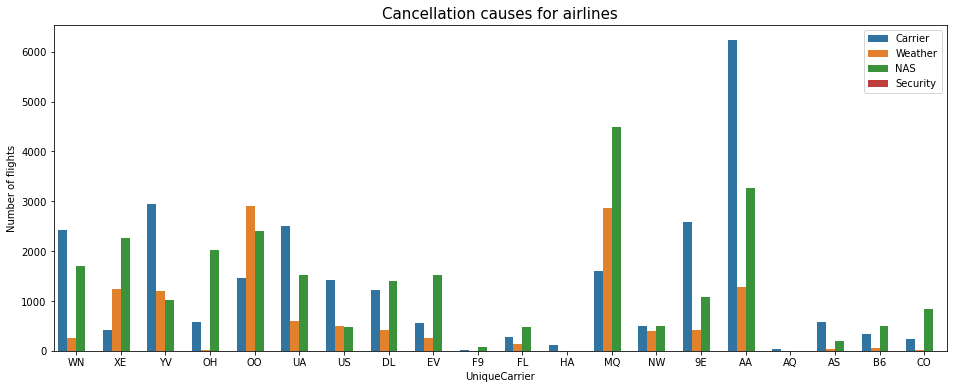

In [5]:
plt.figure(figsize=(16, 6))
sb.countplot(data=df_2008[df_2008['Cancelled'] == 1], x='UniqueCarrier', hue='CancellationCode')
plt.title('Cancellation causes for airlines', fontsize=15);
plt.legend(labels=['Carrier', 'Weather', 'NAS', 'Security']);
plt.ylabel('Number of flights');

## Average Delay time for all the delay causes in every month

> Late aircraft delays were the major causes of delays for every month although they were fewer in April.

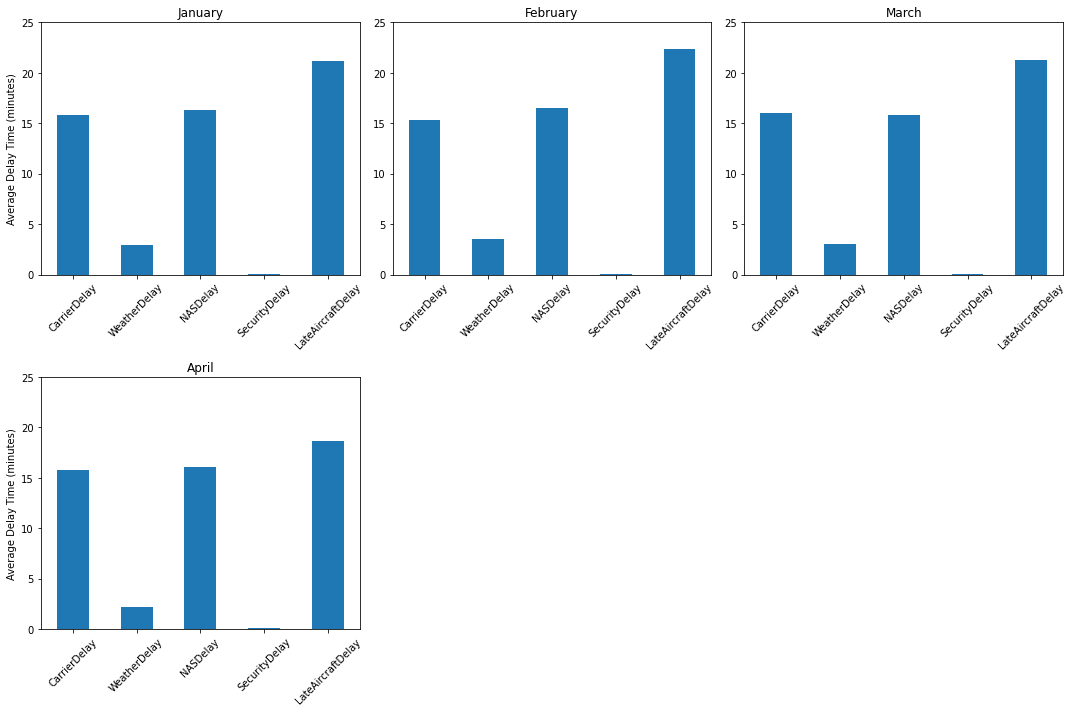

In [6]:
plt.figure(figsize = (15, 10))
for i in np.arange(1, 5):
    plt.subplot(2, 3, i)
    if i in np.arange(1, 5, 3):
        plt.ylabel('Average Delay Time (minutes)')
    df_2008.query('Month == {}'.format(i))[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].mean().plot(kind = 'bar', color = base_color);
    plt.ylim(0, 25)
    plt.xticks(rotation = 45)
    months = ['January', 'February', 'March', 'April']
    plt.title('{}'.format(months[i-1]))
    plt.tight_layout();

In [7]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 729965 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
^C

Interrupted
